Proyecto integrado - Sprint 6 - Data Analyst

# Análisis de ventas de videojuegos

Desarrollado para Ice

## Descripción del proyecto

El proyecto consiste en ...

## Preparación de los datos

### Importación de librerías y Dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Se importa el dataset.  
A continuación se imprime una muestra del mismo, y las informaciones generales del dataset.

In [2]:
df = pd.read_csv('./dataset/games.csv')
display(df.head(10))
print()
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Pre-procesamiento de datos

A continuación, procedemos a identificar la presencia de errores:  
* Valores ausentes
* Filas duplicadas
* Formato erróneo en nombres de columnas
* Errores en tipo de datos  

Para los casos de valores ausentes y duplicados, primeramente evaluaremos su presencia en el dataset, y en qué columnas se encuentran, a fin de analizar posteriormente su resolución.  
Respecto a los errores en el formato de los nombres de las columnas, renombraremos las mismas directamente, a fin de cumplir con el formato snake_case, sin espacios ni mayúsculas.  
En cuanto a los errores en los tipos de datos, evaluaremos qué tipo de datos posee cada columna, y cuál sería el más conveniente según contenido de la columna respectiva.  

Posteriormente al pre-procesamiento de datos, agregaremos una columna con la suma de las ventas totales por videojuego.  

In [3]:
def error_detection(df):
    #Detección de valores ausentes por columna:
    for column in df:
        print(f'Valores ausentes en columna {column}:', df[column].isna().sum())
    print()
    #Detección de filas duplicadas:
    print('Cantidad de filas duplicadas:', df.duplicated().sum())
    print()
    #Cambiar formato erróneo en nombres de columnas:
    new_col_name = {}
    for column in df:
        new_col_name[column]= column.strip().lower().replace(' ', '_')
    df.rename(columns=new_col_name, inplace=True)
    return df

In [4]:
error_detection(df)

Valores ausentes en columna Name: 2
Valores ausentes en columna Platform: 0
Valores ausentes en columna Year_of_Release: 269
Valores ausentes en columna Genre: 2
Valores ausentes en columna NA_sales: 0
Valores ausentes en columna EU_sales: 0
Valores ausentes en columna JP_sales: 0
Valores ausentes en columna Other_sales: 0
Valores ausentes en columna Critic_Score: 8578
Valores ausentes en columna User_Score: 6701
Valores ausentes en columna Rating: 6766

Cantidad de filas duplicadas: 0



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Se presentan una importante cantidad de valores ausentes para ser procesados.  
No se presentan filas duplicadas.  
Se cambiaron automáticamente los nombres de las columnas para cumplir con el formato snake_case.  
Se presentan algunos errores en los tipos de datos, a ser procesados.

#### Valores ausentes

**1- Columnas "name" y "genre":**

In [5]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [6]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
print('Cantidad de valores ausentes en "name" y "genre":', df['name'].isna().sum())
print('Porcentaje que representan: %', (df['name'].isna().sum()) / (df['name'].count()) * 100)

Cantidad de valores ausentes en "name" y "genre": 2
Porcentaje que representan: % 0.011966732483695326


Los valores ausentes detectados en la columna "name" se corresponden también a los valores ausentes de la columna "genre". Siendo solo dos filas en 16715, su eliminación del dataset no supone una alteración relevante, por representar solo un 0,01 % del total de datos.

In [8]:
df = df.dropna(subset='name').reset_index(drop=True)
print('Cantidad de valores ausentes en "name" y "genre":', df['name'].isna().sum())
print('Cantidad de filas en el DataFrame:', (df['name'].count()))

Cantidad de valores ausentes en "name" y "genre": 0
Cantidad de filas en el DataFrame: 16713


Se eliminaron correctamente las dos filas con valores ausentes en las columnas "name" y "genre".

**2- Columna "year_of_release":**

In [9]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Se evalúa a continuación si el mismo videojuego fue lanzado en más de una plataforma, porque, de ser así, podríamos obtener un año de lanzamiento bastante aproximado para el videojuego que no posee dicho dato a partir de la fecha de lanzamiento en otra plataforma.  
Lo evaluamos con el primer videojuego de la lista:

In [10]:
df[df['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1880,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3888,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5707,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Para reemplazar los valores ausentes en todo el DataFrame se crea un Series agrupando el DataFrame original por la columna "name", extrayendo únicamente la columna "year_of_release", y aplicando como método la mediana, ya que el mismo videojuego puede haber sido lanzado por distintas plataformas en diferentes años, y usando la mediana, el valor resultante no tendrá dicimales, como sí lo tendría, por ejemplo, el promedio.  
Posteriormente, el Series es usado como argumento del método fillna(), para reemplazar los valores ausentes según el nombre del videojuego.

In [11]:
years_from_platform = df.groupby('name')['year_of_release'].median()
years_from_platform

name
 Beyblade Burst                 2016.0
 Fire Emblem Fates              2015.0
 Frozen: Olaf's Quest           2013.0
 Haikyu!! Cross Team Match!     2016.0
 Tales of Xillia 2              2012.0
                                 ...  
thinkSMART: Chess for Kids      2011.0
uDraw Studio                    2010.0
uDraw Studio: Instant Artist    2011.0
wwe Smackdown vs. Raw 2006         NaN
¡Shin Chan Flipa en colores!    2007.0
Name: year_of_release, Length: 11559, dtype: float64

In [12]:
df['year_of_release'] = df.set_index('name')['year_of_release'].fillna(years_from_platform).reset_index(drop=True)

Realizamos un test sobre algunos de los videojuegos que presentaban valores ausentes en 'year_of_release':

In [13]:
df[(df['name'] == 'Madden NFL 2004') | (df['name'] == 'FIFA Soccer 2004') | (df['name'] == 'LEGO Batman: The Videogame')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2003.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.00,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,2008.0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.00,0.29,72.0,8,E10+
1518,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.00,0.19,75.0,7.7,E10+
1537,LEGO Batman: The Videogame,PSP,2008.0,Action,0.57,0.44,0.00,0.27,73.0,7.4,E10+
1552,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.00,0.52,77.0,8.9,E10+
1880,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
2605,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E


Muchos de los valores ausentes se reemplazaron correctamente.  
Evaluamos a continuación cuántos valores ausentes aún quedan.

In [14]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1141,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16275,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16286,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16346,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
df[(df['name'] == 'All-Star Baseball 2005') | (df['name'] == 'Sega Rally 2006')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5654,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E
8917,All-Star Baseball 2005,XB,NaN,Sports,0.11,0.03,0.00,0.01,75.0,8.8,E
13928,Sega Rally 2006,PS2,NaN,Racing,0.00,0.00,0.04,0.00,NaN,NaN,NaN


Algunos de los valores ausentes aún presentes contienen el año en el mismo nombre, por lo que se puede extraer del mismo, a fin de reemplazar el valor ausente.

In [16]:
pattern = r'(\d+)'
extract_numbers = df[['name', 'year_of_release']].copy()
extract_numbers['number_extract'] = extract_numbers['name'].str.extract(pattern).astype('float')
extract_numbers[extract_numbers['year_of_release'].isna()].sort_values(by='number_extract', ascending=False).head(20)

,name,year_of_release,number_extract
13194,Tour de France 2011,NaN,2011.0
16077,Football Manager 2007,NaN,2007.0
13928,Sega Rally 2006,NaN,2006.0
475,wwe Smackdown vs. Raw 2006,NaN,2006.0
8917,All-Star Baseball 2005,NaN,2005.0
5654,All-Star Baseball 2005,NaN,2005.0
4774,NFL GameDay 2003,NaN,2003.0
6265,Indy 500,NaN,500.0
12045,Drake of the 99 Dragons,NaN,99.0
1300,Triple Play 99,NaN,99.0


Del Data Frame obtenido, podemos concluir que son 7 los videojuegos de los cuales podremos extraer los años del nombre, ya que del resto de los números extraídos no se puede concluir que se traten de una fecha. De los que podemos asegurar que el valor incluído en el nombre se trata del año, todos se encuentran incluidos entre los valores: ['2003', '2005', '2006', '2007', '2011'].  
Por lo tanto, para reemplazar los valores ausentes de dichos videojuegos, se procede generando un Series con los nombres de los videojuegos y los valores a reemplazar, a fin de utilizar dicho Series como argumento en el método fillna().

In [17]:
years_from_names = extract_numbers[extract_numbers['year_of_release'].isna()].query('number_extract >= 2000')[['name', 'number_extract']]
years_from_names = years_from_names.groupby('name')['number_extract'].median()
years_from_names

name
All-Star Baseball 2005        2005.0
Football Manager 2007         2007.0
NFL GameDay 2003              2003.0
Sega Rally 2006               2006.0
Tour de France 2011           2011.0
wwe Smackdown vs. Raw 2006    2006.0
Name: number_extract, dtype: float64

In [18]:
df['year_of_release'] = df.set_index('name')['year_of_release'].fillna(years_from_names).reset_index(drop=True)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Realizamos un test sobre algunos de los videojuegos que presentaban valores ausentes en 'year_of_release':

In [19]:
df[(df['name'] == 'All-Star Baseball 2005') | (df['name'] == 'Sega Rally 2006')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5654,All-Star Baseball 2005,PS2,2005.0,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E
8917,All-Star Baseball 2005,XB,2005.0,Sports,0.11,0.03,0.00,0.01,75.0,8.8,E
13928,Sega Rally 2006,PS2,2006.0,Racing,0.00,0.00,0.04,0.00,NaN,NaN,NaN


Evaluamos a continuación cuántos valores ausentes permanencen en la columna 'year_of_release':

In [20]:
print('Cantidad de valores ausentes en "year_of_release":', df['year_of_release'].isna().sum())
print('Porcentaje que representan: %', (df['year_of_release'].isna().sum()) / (df['name'].count()) * 100)

Cantidad de valores ausentes en "year_of_release": 139
Porcentaje que representan: % 0.8316879076168251


Conclusión:  
El porcentaje que representan los valores ausentes remanentes del total de valores de la columna es bajo (menor al 1%), pero por los datos que los mismos poseen en las otras columnas, se considera que no es conveniente su eliminación del dataset, por lo que se decide mantener los valores ausentes remanentes como tales.

**3- Columnas "critic_score", "user_score" y "rating":**

In [21]:
print('Cantidad de valores ausentes en "critic_score":', df['critic_score'].isna().sum())
print('Porcentaje que representan: %', (df['critic_score'].isna().sum()) / (df['name'].count()) * 100)
print()
print('Cantidad de valores ausentes en "user_score":', df['user_score'].isna().sum())
print('Porcentaje que representan: %', (df['user_score'].isna().sum()) / (df['name'].count()) * 100)
print()
print('Cantidad de valores ausentes en "rating":', df['rating'].isna().sum())
print('Porcentaje que representan: %', (df['rating'].isna().sum()) / (df['name'].count()) * 100)

Cantidad de valores ausentes en "critic_score": 8576
Porcentaje que representan: % 51.313348890085564

Cantidad de valores ausentes en "user_score": 6699
Porcentaje que representan: % 40.0825704541375

Cantidad de valores ausentes en "rating": 6764
Porcentaje que representan: % 40.4714892598576


NaN en columna "critic_score"

In [22]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


NaN en columna "user_score"

In [23]:
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


NaN en columna "rating"

In [24]:
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Los valores ausentes de las columnas "critic_score", "user_score" y "rating" representan un porcentaje mayor al 40% de los datos, por lo que su reemplazo por algún valor calculado, o estimado, puede influir notablemente en los resultados del análisis, y claramente no pueden ser eliminados, dado que poseen datos en el resto de las columnas.  
A su vez, el dataset no proporciona ninguna información como para poder estimar estos valores, dado que la causa probablemente de ausencia de valores sea que directamente nunca se hayan evaluado y calificado dichos videojuegos.  
Por lo expuesto, se decide mantenerlos como valores ausentes.

**4- Valores "tbd" (to be determined) en columna "user_score":**

In [25]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16693,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16695,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16696,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16702,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Los valores "tbd" son valores ausentes en cierto sentido, ya que probablemente no se cuente con dichos datos por aún estarse calificando todavía.  
Una opción podría ser reemplazarlos por el valor del "critic_score" correspondiente al mismo videojuego y plataforma. Se analiza si es una alternativa representativa y viable.

In [26]:
df[df['user_score'] != 'tbd'].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Comparando los valores de las columnas "critic_score" con los de la columna "user_score" (considerando que las escalas de medición son diferentes, ya que la primera califica de 0 a 100 mientras que la segunda de 0 a 10), se percibe que las calificaciones son muy similares, con muy poca diferencia, por lo que reemplazar los valores "tbd" por el valor del "critic_score" (en la escala de "user_score") puede ser una buena alternativa.  
Para el caso donde el valor en "user_score" es "tbd" y en "critic_score" es valor ausente, el "tbd" se transformará en valor ausente, lo que se considera correcto, ya que de igual manera no podremos estimar dichos valores de otra forma, y al pasar a ser valores ausentes, podremos operar con los datos sin la influencia de los mismos.

In [27]:
df['user_score'] = np.where(df['user_score'] == "tbd", df['critic_score']/10, df['user_score'])
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [28]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Conclusión pre-procesamiento de valores ausentes:  
Se procesaron....

#### Tipos de datos

Se imprime a continuación la información del DataFrame con los valores ausentes ya procesados, y sin valores "TBD".

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16574 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       8672 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


De los tipos de datos en las diferentes columnas, se observa que la columna "user_score" posee datos del tipo "object" de pandas, cuando los mismos son numéricos, por lo que convendría convertirlos a datos del tipo 'float'.

In [30]:
df['user_score'] = df['user_score'].astype(float)
display(df.head())
df.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16574 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       8672 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [31]:
df[(df['year_of_release'] == 2001.5) | (df['year_of_release'] == 2002.5)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1698,Hitman 2: Silent Assassin,XB,2002.5,Action,0.76,0.38,0.0,0.05,84.0,8.0,M
12216,Rayman Arena,XB,2001.5,Racing,0.05,0.01,0.0,0.00,50.0,5.0,E
14747,Tom and Jerry in War of the Whiskers,XB,2002.5,Fighting,0.02,0.01,0.0,0.00,NaN,NaN,NaN


Se detectan valores atípicos para la columna del año de lanzamiento, por lo que se transformará dicha columna en datos del tipo datetime, y se extraerá de los mismos el año correspondiente. Al hacerlo, volverá a transformarse en dato tipo float, pero desaparecerán esos valores decimales, quedando únicamente el valor del año en forma correcta.

In [32]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [33]:
df[(df['year_of_release'] == 2001.5) | (df['year_of_release'] == 2002.5)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Ventas totales

In [34]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## Análisis de datos

### Variación y relación entre parámetros

#### Lanzamientos de juegos por períodos

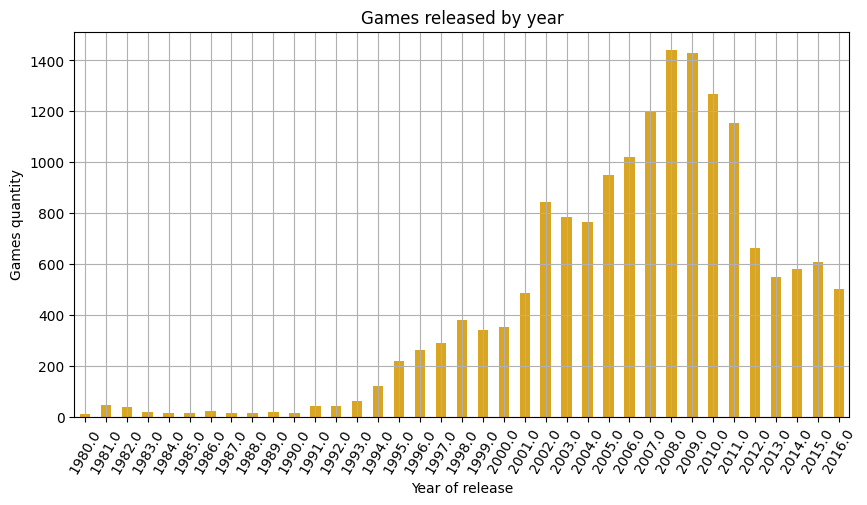

In [35]:
#Agrupo por año de lanzamiento, y cuento cantidad de juegos
df.groupby('year_of_release')['name'].count().plot(kind='bar', x='year_of_release', title='Games released by year', xlabel='Year of release', ylabel='Games quantity', figsize=[10, 5], color='#DAA520', rot=60, grid=True)
plt.show()

Observaciones:  
Se observa que claramente las ventas de videojuegos han dependido mucho de las épocas, con una tendencia a crecer en forma exponencial desde el inicio de los años 80s y hasta los años 2007/2008. A partir de dichos años, comienza a disminuir la cantidad de ventas para los años siguientes, pero manteniéndose en un nivel relativamente alto.  
Claramente el avance en la tecnología, y con ello el desarrollo de mayor cantidad de videojuegos, con calidad y tecnología creciente fueron creando más demanda en el tiempo, haciendo crecer las ventas.  
La disminución de ventas a partir del años 2008 puede deberse a varias causas, entre las cuales podrían incluirse:  
* El desarrollo de nuevos videojuegos deja de ser significativamente innovador respecto de juegos anteriores.  
* El creciente desarrollo de videojuegos con modalidad online gratuitos puede haber producido que muchos usuarios dejaran de comprar nuevos juegos.  



#### Ventas por plataformas

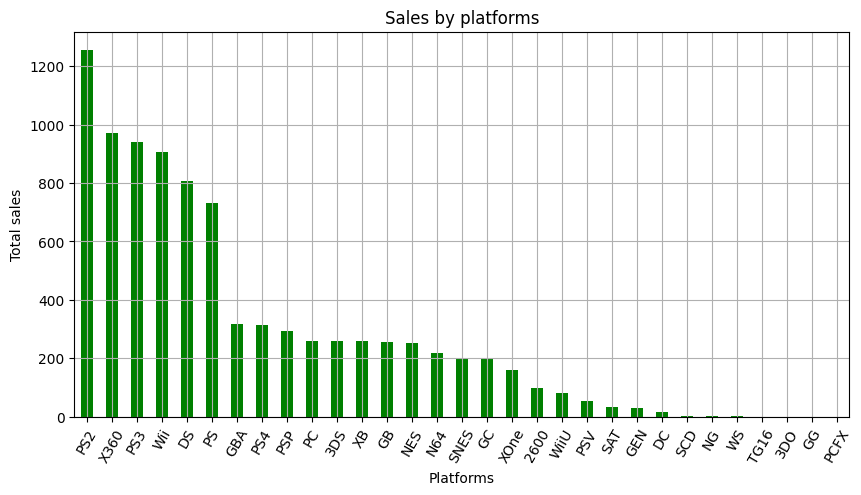

In [36]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', x='platform', title='Sales by platforms', xlabel='Platforms', ylabel='Total sales', figsize=[10, 5], color='#008000', rot=60, grid=True)
plt.show()

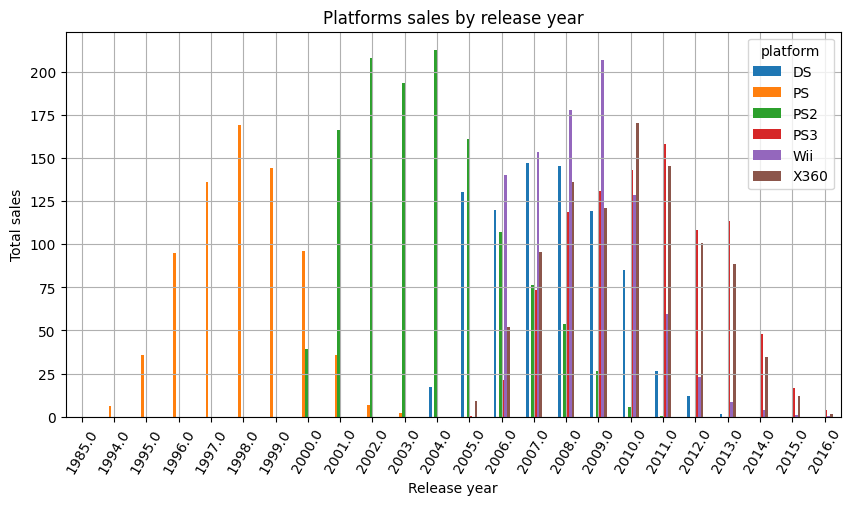

In [37]:
more_saled_games = df.query('(platform == "PS2") or (platform == "X360") or (platform == "PS3") or (platform == "Wii") or (platform == "DS") or (platform == "PS")')
pivot_platform_sales_years = more_saled_games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
pivot_platform_sales_years
pivot_platform_sales_years.plot(kind='bar', title='Platforms sales by release year', xlabel='Release year', ylabel='Total sales', figsize=[10, 5], rot=60, grid=True)
plt.show()


Observaciones:  
Se observa ....

Según los datos observados en los gráficos anteriores, se puede concluir que los períodos para los que debemos tomar datos es de 1993 en adelante, ya que las ventas registradas para años anteriores son escasas, y las plataformas más populares (con mayor cantidad de ventas) aparecieron desde el año 1993 en adelante.  
A continuación se asigna un nuevo Data Frame con los datos para todos los videojuegos con fecha de lanzamiento posterior a 1993, y se compara la cantidad de ventas totales de dicho Data Frame filtrado con la cantidad de ventas totales del Data Frame original, para evaluar su incidencia.

In [38]:
df_use = df.query('year_of_release >= 1993')
print(f'La cantidad de ventas totales considerando todos los años incluidos en el dataset es: {df['total_sales'].sum()}')
print(f'La cantidad de ventas totales considerando los juegos posteriores al 1993 es: {df_use['total_sales'].sum()}, y representan un {(df_use['total_sales'].sum() / df['total_sales'].sum())*100} %')


La cantidad de ventas totales considerando todos los años incluidos en el dataset es: 8913.29
La cantidad de ventas totales considerando los juegos posteriores al 1993 es: 8339.310000000001, y representan un 93.56040250008697 %


En términos de ventas totales, los juegos posteriores al año 1993 representan más del 93.5% del total, por lo tanto, se confirma que trabajar con dicho grupo de datos es suficiente.

### Plataformas

Plataformas líderes en venta:  
Dado que, según lo observado, las plataformas suelen tener un período de auge en las ventas de 9 a 10 años, se realiza un análisis para los últimos 10 años (2007-2016) y otro para los últimos 2 años (2015-2016) a fin de ver cuáles plataformas son actualmente líderes de ventas, cuáles están creciendo respectivamente, y cuáles están disminuyendo en sus ventas.

In [39]:
print('Plataformas con mayor cantidad de ventas totales en el período 2007-2016:')
df_use.query('year_of_release >= 2007').groupby('platform')['total_sales'].sum().sort_values(ascending=False)

Plataformas con mayor cantidad de ventas totales en el período 2007-2016:


platform
PS3     913.56
X360    905.66
Wii     763.12
DS      537.04
PS4     314.14
3DS     258.51
PSP     186.39
PC      163.61
PS2     162.49
XOne    159.32
WiiU     82.19
PSV      53.81
GBA       3.40
XB        0.73
GC        0.27
DC        0.06
Name: total_sales, dtype: float64

In [40]:
print('Plataformas con mayor cantidad de ventas totales en los últimos dos años, 2015-2016:')
df_use.query('year_of_release >= 2015').groupby('platform')['total_sales'].sum().sort_values(ascending=False)

Plataformas con mayor cantidad de ventas totales en los últimos dos años, 2015-2016:


platform
PS4     188.15
XOne     86.29
3DS      42.92
WiiU     20.95
PS3      20.42
PC       13.77
X360     13.48
PSV      10.50
Wii       1.32
PSP       0.12
Name: total_sales, dtype: float64

Se observa lo siguiente:  
* En los últimos 10 años, la mayor cantidad de ventas fue realizada por parte de la plataforma PS3, seguida por X360, Wii, DS, PS4, etc. respectivamente, y en el lugar décimo, XOne.  
* En los últimos dos años, se nota un crecimiento de ventas de las plataformas PS4, XOne y 3DS, así como una importante disminución de las ventas en las plataformas PS3, X360 y Wii.  
* Algunas plataformas desaparecieron totalmente en los últimos dos años, como DS, PS2, GBA, XB, GC y DC. Las últimas ya estaban en disminución desde los últimos diez años.  

Entre las plataformas más rentables de los últimos dos años, se procede a evaluar la curva de crecimiento actual de cada una, a fin de determinar cuáles de las mismas son **potencialmente** rentables actualmente.

In [41]:
more_saled_last_years = df_use.query('(year_of_release >= 2007) and ((platform == "PS4") or (platform == "XOne") or (platform == "3DS") or (platform == "WiiU"))')
pivot_sales_last_years = more_saled_last_years.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
pivot_sales_last_years

platform,3DS,PS4,WiiU,XOne
year_of_release,,,,
2010.0,0.30,NaN,NaN,NaN
2011.0,63.20,NaN,NaN,NaN
2012.0,51.76,NaN,17.56,NaN
2013.0,56.57,25.99,21.65,18.96
2014.0,43.76,100.00,22.03,54.07
2015.0,27.78,118.90,16.35,60.14
2016.0,15.14,69.25,4.60,26.15


Como los datos para el año 2016 podrían estar incompletos, y a fin de que la ausencia de datos de dicho año no lleve a conclusiones erradas, se excluye dicho año en la tabla anterior.

platform,3DS,PS4,WiiU,XOne
year_of_release,,,,
2010.0,0.30,NaN,NaN,NaN
2011.0,63.20,NaN,NaN,NaN
2012.0,51.76,NaN,17.56,NaN
2013.0,56.57,25.99,21.65,18.96
2014.0,43.76,100.00,22.03,54.07
2015.0,27.78,118.90,16.35,60.14


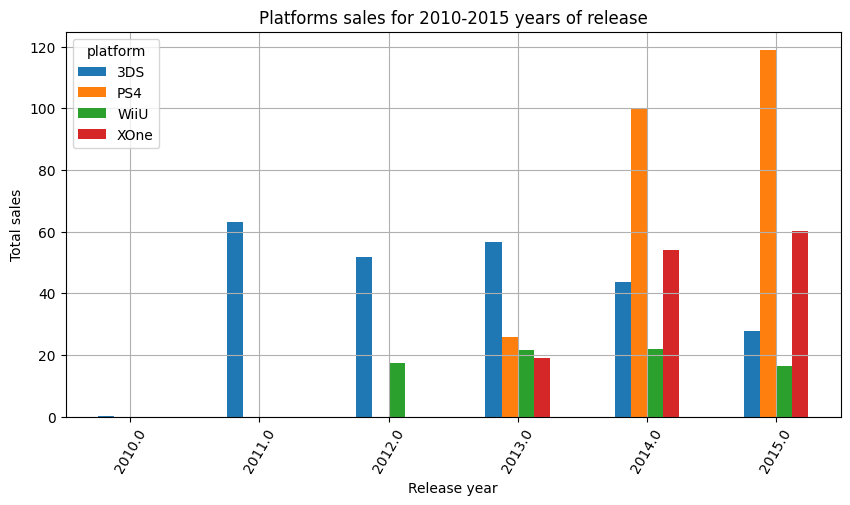

In [42]:
more_saled_last_years = df_use.query('(year_of_release >= 2007 and year_of_release < 2016) and ((platform == "PS4") or (platform == "XOne") or (platform == "3DS") or (platform == "WiiU"))')
pivot_sales_last_years = more_saled_last_years.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
display(pivot_sales_last_years)
pivot_sales_last_years.plot(kind='bar', title='Platforms sales for 2010-2015 years of release', xlabel='Release year', ylabel='Total sales', figsize=[10, 5], rot=60, grid=True)
plt.show()

Se concluye que las plataformas potencialemente rentables son **PS4** y **XOne**, dado que las mismas se encuentran en la zona de crecimiento en las ventas, y todo parece indicar que las mismas irán en aumento, ya que solamente llevan en el mercado 4 años (contando con el año 2016).

Procedemos a realizar un análisis de los videojuegos de las plataformas potencialemtene rentables en la actualidad (PS4 y XOne).  
Primeramente realizamos una comparativa de las ventas globales de ambas plataformas mediante diagramas de caja.

PLATAFORMA PS4


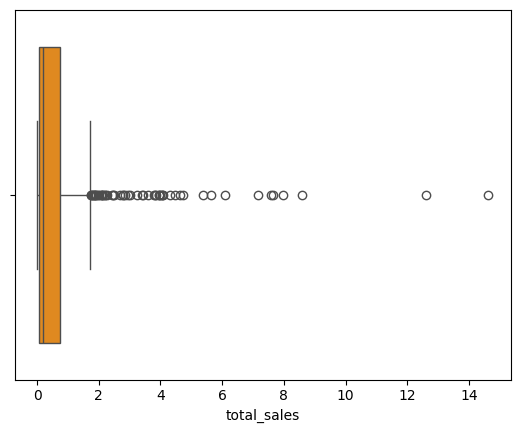

In [43]:
print('PLATAFORMA PS4')
sales_ps4 = df_use.query('platform == "PS4"')['total_sales']
sns.boxplot(x=sales_ps4, color='#FF8C00')
plt.show()

PLATAFORMA XONE


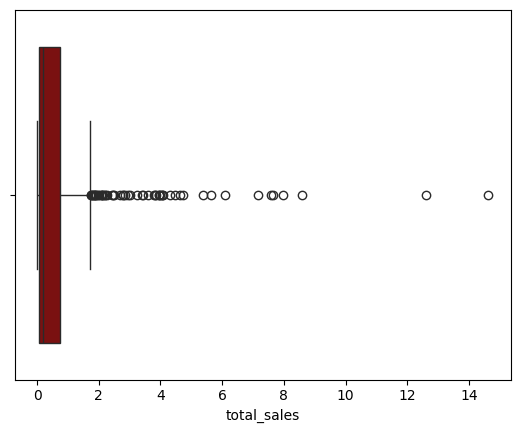

In [44]:
print('PLATAFORMA XONE')
sales_xone = df_use.query('platform == "XOne"')['total_sales']
sns.boxplot(x=sales_ps4, color='#8B0000')
plt.show()

Colocamos a continuación ambos diagramas de cajas en un único gráfico, a fin de poder comparar los mismos, y le damos una escala que sea suficiente para poder comparar visulamente el intervalo intercuartílico:

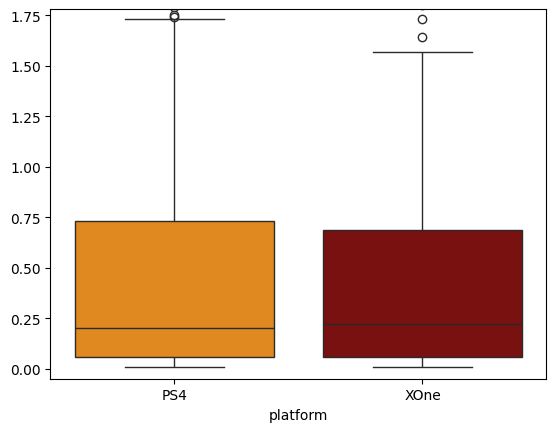


Descripción general de valores para plataforma PS4:
count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: PS4, dtype: float64 

Descripción general de valores para plataforma XOne:
count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: XOne, dtype: float64


In [45]:
sales_ps4_xone = df_use.query('platform == "PS4" or platform == "XOne"').pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
colors = ['#FF8C00', '#8B0000']
sns.boxplot(data=sales_ps4_xone, palette=colors)
plt.ylim(-0.05, 1.78)
plt.show()
print()
print('Descripción general de valores para plataforma PS4:')
print(sales_ps4_xone['PS4'].describe(), '\n')
print('Descripción general de valores para plataforma XOne:')
print(sales_ps4_xone['XOne'].describe())

De la comparativa, podemos observar:  
* La plataforma PS4 tiene un volumen de ventas totales bastante superior a la plataforma XOne.  
* El promedio de las ventas en ambas plataformas es bastante similar, 0.80 para PS4 y 0.64 para XOne.  
* El intervalo intercuartílico, dentro del cual se encuentra el 50% de los valores es bastante similar en ambas plataformas, con ventas entre 0.06 a 0.73 millones de dólares para PS4 y ventas entre 0.06 a 0.68 millones de dólares para XOne.  
* En ambas plataformas se presentan valores atípicos en las ventas, con un máximo de recaudación en un juego de 14.63 millones de dólares para la plataforma PS4, y un máximo de recaudación en un juego de 7.39 millones de dólares para la plataforma XOne.  


### Videojuegos

Se analizará a continuación cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular. Se analizará para la plataforma PS3, que, si bien ya está en disminución de las ventas, es más representativa por contar con datos desde su aparición y hasta su casi desaparición en los últimos registros del dataset en análisis (11 años aproximadamente).

#### Videojuegos PS3

In [46]:
#Juegos líderes en venta para PS3
ps3_games = df_use.query('platform == "PS3"').sort_values(by='total_sales', ascending=False)
ps3_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010.0,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70
...,...,...,...,...,...,...,...,...,...,...,...,...
16102,Nobunaga no Yabou Online: Houou no Shou,PS3,2012.0,Strategy,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
15889,Rugby League Live 3,PS3,2015.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
15878,Turbo: Super Stunt Squad,PS3,2013.0,Sports,0.00,0.01,0.00,0.00,38.0,3.8,E,0.01
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


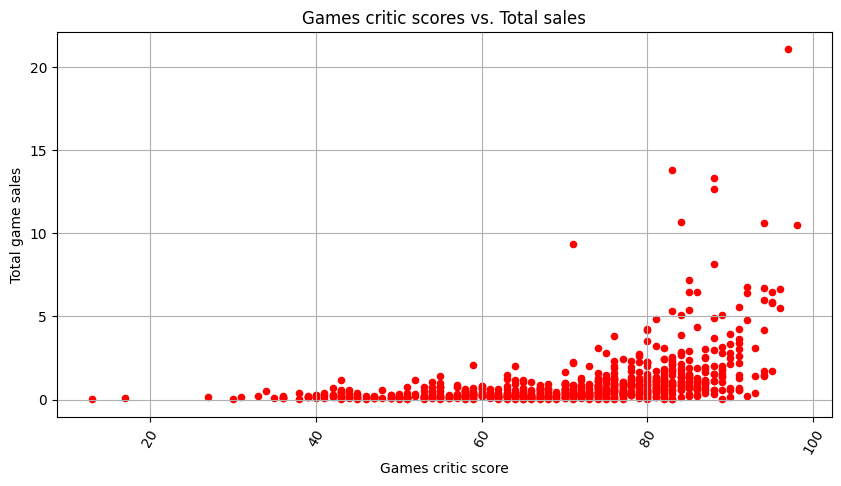

Coeficiente de correlación entre "critic_score" y "total_sales" para los juegos de PS3: 0.4322750459925113


In [47]:
#Correlación entre las reseñas de profesionales con las ventas
ps3_games.plot(kind='scatter', x='critic_score', y='total_sales', title='Games critic scores vs. Total sales', xlabel='Games critic score', ylabel='Total game sales', figsize=[10, 5], rot=60, grid=True, color='#FF0000')
plt.show()
print('Coeficiente de correlación entre "critic_score" y "total_sales" para los juegos de PS3:', ps3_games['critic_score'].corr(ps3_games['total_sales']))

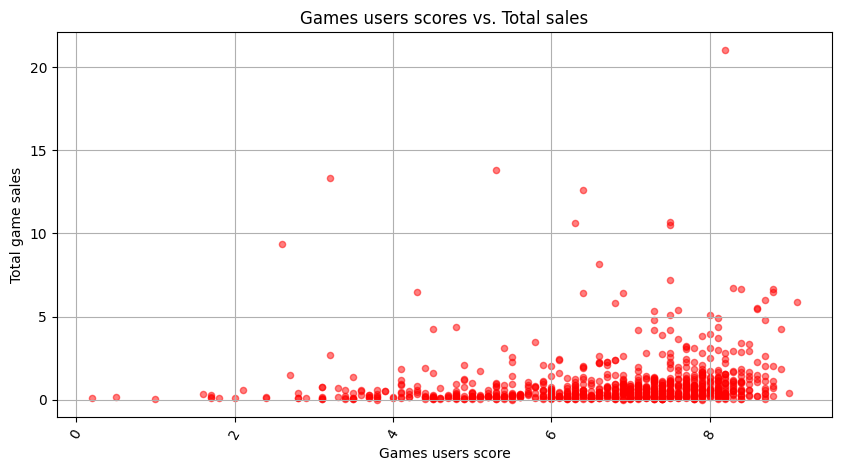

Coeficiente de correlación entre "user_score" y "total_sales" para los juegos de PS3: 0.1357116785683478


In [48]:
#Correlación entre las reseñas de profesionales con las ventas
ps3_games.plot(kind='scatter', x='user_score', y='total_sales', title='Games users scores vs. Total sales', xlabel='Games users score', ylabel='Total game sales', figsize=[10, 5], rot=60, grid=True, color='#FF0000', alpha=0.5)
plt.show()
print('Coeficiente de correlación entre "user_score" y "total_sales" para los juegos de PS3:', ps3_games['user_score'].corr(ps3_games['total_sales']))

Del análisis de relación entre las reseñas de profesionales y usuarios con las cantidades de ventas de los videojuegos se puede concluir:  
* Hay una leve correlación positiva entre las ventas y las reseñas de los críticos profesionales. En juegos con calificación inferior a 60 parece no influir demasiado la calificación con las ventas. Sin embargo, para calificaciones a partir de 60, y aún más a partir de 80, pareciera que la opinión de los críticos profesionales tienen una gran influencia en la compra de videojuegos. Sin duda los usuarios buscan reseñas oficiales para decidir antes de comprar un videojuego.  
* La correlación de las ventas de videojuegos con las reseñas de usuarios es mucho menor. Si bien hay una cierta correlación positiva, especialmente a partir de una calificación de 6, existen juegos con elevado número de ventas que presentan calificaciones bajas, inferiores a los 6 puntos.  

Como conclusión, para poder hacer crecer la rentabilidad de un videojuego, es muy importante conseguir una calificación por parte de los críticos profesionales superior a los 80 puntos.

#### Juegos que son comunes en PS3 y otras plataformas

In [49]:
df_use.query('name in @ps3_games.name').groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS3     935.19
X360    721.06
Wii     193.40
PS4     184.48
PS2     124.33
PC       85.06
XOne     83.80
DS       64.94
PSP      60.19
PSV      23.30
3DS      18.74
WiiU     18.25
PS       15.47
XB        4.04
GC        2.97
SNES      1.38
GBA       1.04
N64       0.21
SAT       0.17
Name: total_sales, dtype: float64

Hay 19 plataformas que comparten juegos con la plataforma PS3, por lo que elegiremos las dos plataformas que le siguen en volumen de ventas para comparar con las conclusiones tomadas para PS3.

In [50]:
x360_wii_ps3_games = df_use.query('(name in @ps3_games.name) and (platform == "X360" or platform == "Wii")')
x360_wii_ps3_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010.0,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
36,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,8.52,3.59,0.08,1.28,94.0,6.3,M,13.47
...,...,...,...,...,...,...,...,...,...,...,...,...
16472,John Daly's ProStroke Golf,X360,2010.0,Sports,0.01,0.00,0.00,0.00,57.0,NaN,E,0.01
16489,Ride,X360,2015.0,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16548,Superstars V8 Racing,X360,2009.0,Racing,0.00,0.01,0.00,0.00,62.0,NaN,E,0.01
16620,World Snooker Championship 2007,X360,2007.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


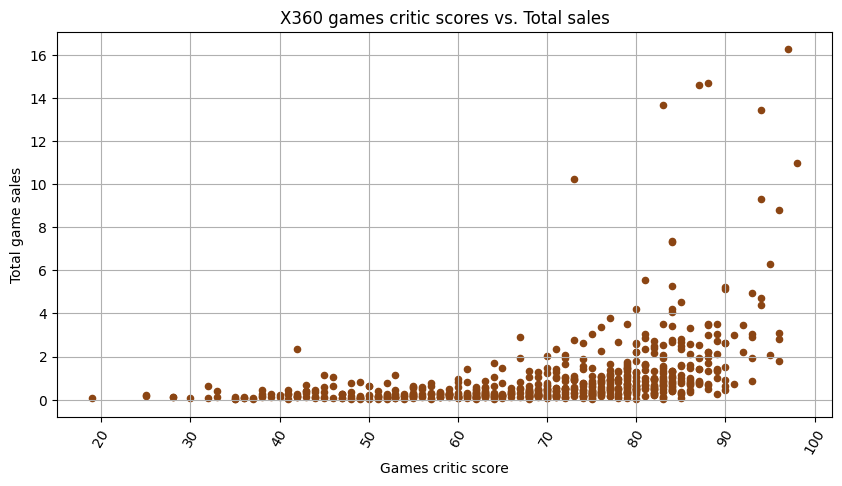

Coeficiente de correlación entre "critic_score" y "total_sales" para los juegos de X360: 0.415411098673177


In [51]:
#Correlación entre las reseñas de profesionales con las ventas
x360_wii_ps3_games.query('platform == "X360"').plot(kind='scatter', x='critic_score', y='total_sales', title='X360 games critic scores vs. Total sales', xlabel='Games critic score', ylabel='Total game sales', figsize=[10, 5], rot=60, grid=True, color='#8B4513')
plt.show()
print('Coeficiente de correlación entre "critic_score" y "total_sales" para los juegos de X360:', x360_wii_ps3_games.query('platform == "X360"')['critic_score'].corr(x360_wii_ps3_games.query('platform == "X360"')['total_sales']))

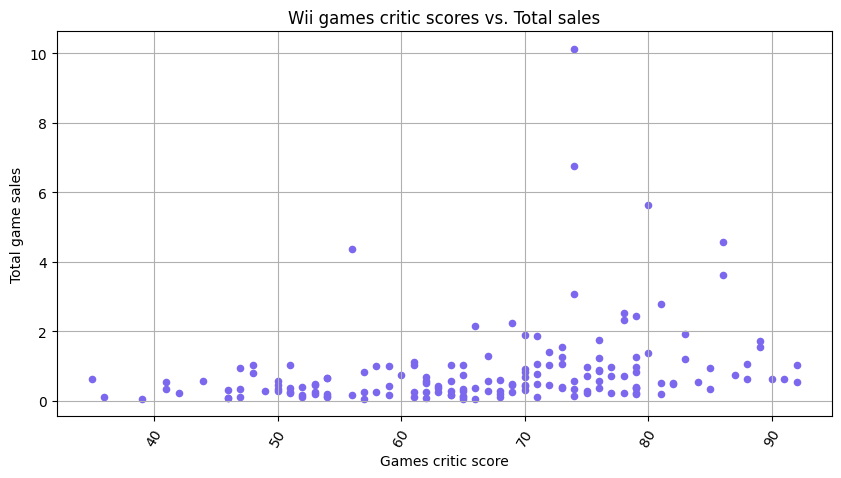

Coeficiente de correlación entre "critic_score" y "total_sales" para los juegos de X360: 0.2765751790080939


In [52]:
#Correlación entre las reseñas de profesionales con las ventas
x360_wii_ps3_games.query('platform == "Wii"').plot(kind='scatter', x='critic_score', y='total_sales', title='Wii games critic scores vs. Total sales', xlabel='Games critic score', ylabel='Total game sales', figsize=[10, 5], rot=60, grid=True, color='#7B68EE')
plt.show()
print('Coeficiente de correlación entre "critic_score" y "total_sales" para los juegos de X360:', x360_wii_ps3_games.query('platform == "Wii"')['critic_score'].corr(x360_wii_ps3_games.query('platform == "Wii"')['total_sales']))

Para los mismos juegos, la correlación es semejante entre PS3 y X360, aunque difiere unn poco con Wii. No obstante, se observa que la cantidad de juegos compartidos en Wii es menor, por lo que la diferencia podría deberse a eso mismo.  
Se confirma entonces que las conclusiones tomadas para la plataforma PS3 en cuanto a la influencia de las reseñas de profesionales sobre las ventas totales son independientes de la plataforma, para los mismos juegos.

### Juegos por género

Se efectúa a continuación un análisis de la distribución de ventas de videojuegos por género, a fin de observar el género de mayor rentabilidad total.

genre
Action          1667.54
Sports          1287.84
Shooter          987.98
Role-Playing     901.88
Misc             780.95
Racing           697.37
Platform         659.75
Fighting         423.73
Simulation       382.53
Adventure        214.08
Strategy         171.94
Puzzle           163.72
Name: total_sales, dtype: float64

<Axes: title={'center': 'Games sales by genre'}, xlabel='Games genre', ylabel='Total sales'>

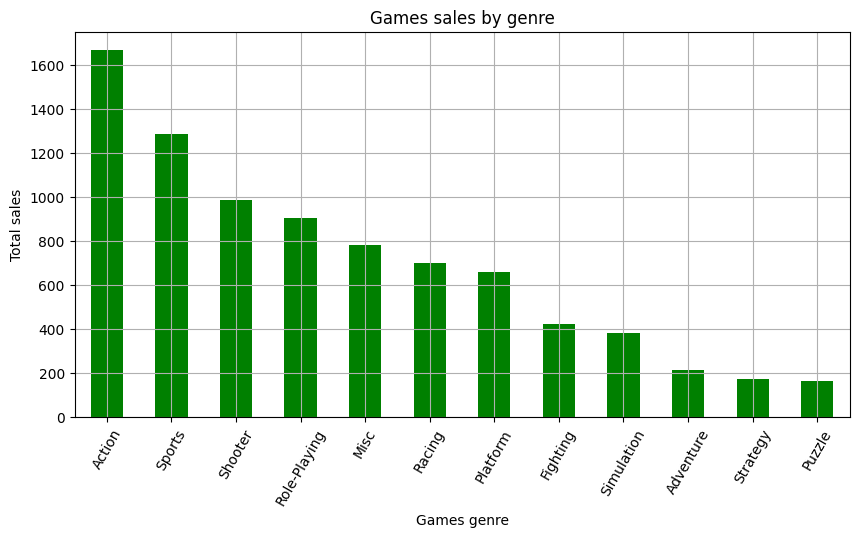

In [53]:
display(df_use.groupby('genre')['total_sales'].sum().sort_values(ascending=False))
df_use.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', xlabel='Games genre', ylabel='Total sales', title='Games sales by genre', figsize=[10, 5], rot=60, grid=True, color='#008000')

Es conveniente observar también cómo fue variando en el tiempo la preferencia de un género, a fin de poder determinar la rentabilidad actual de los diferentes géneros.  
Para esto se toman los tres primeros juegos más vendidos en general, y uno de menor cantidad de ventas, a fin de poder evaluar si el ranking obtenido anteriormente se cumple para todos los años, o si hubo diferentes preferencias en los usuarios en diferentes épocas.  
Se toman las siguientes consideraciones:  
* Se representan las variaciones con diagramas de líneas, aún siendo datos discretos, ya que el mismo es más claro para comparar que un diagrama de barras.
* Se excluyen los datos del año 2016, ya que, al poder estar los mismos incompletos, podrían representar en forma incorrecta la distribución esperada.

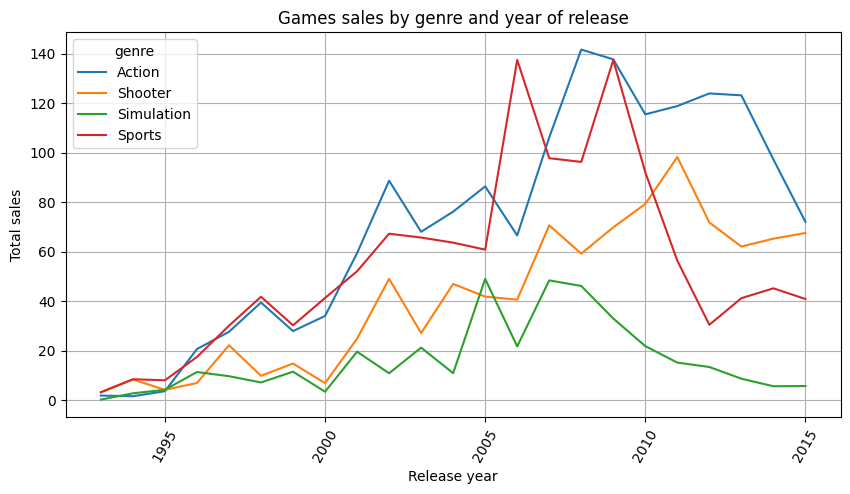

In [54]:
df_use.query('(year_of_release < 2016) and (genre == "Action" or genre == "Sports" or genre == "Shooter" or genre == "Simulation")').pivot_table(index='year_of_release', columns='genre', values='total_sales', aggfunc='sum').plot(kind='line', title='Games sales by genre and year of release', xlabel='Release year', ylabel='Total sales', figsize=[10, 5], rot=60, grid=True)
plt.show()

La variación en las ventas de los juegos por los géneros considerados se muestra claramente ascendente hasta un período previo al año 2010, en donde comienzan a ser menos preferidos, con la excepción de los juegos de Shooter, los cuales comienzan a superar en ventas a los juegos de la categoría Sports, y en el año 2015 casi igualan a los del género Action. Un género potencialemtente rentable es, entonces, el "Shooter".

## Perfiles de usuarios por región

### Las cinco plataformas de mayor ventas

In [64]:
#Norteamérica
na_more_saled = df_use.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5].reset_index()
print('Las cinco plataformas de mayor ventas en Norteamérica:')
display(na_more_saled)
print()

#Europa
eu_more_saled = df_use.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5].reset_index()
print('Las cinco plataformas de mayor ventas en Europa:')
display(eu_more_saled)
print()

#Japón
jp_more_saled = df_use.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5].reset_index()
print('Las cinco plataformas de mayor ventas en Japón:')
display(jp_more_saled)

Las cinco plataformas de mayor ventas en Norteamérica:


,platform,na_sales
0,X360,599.15
1,PS2,582.02
2,Wii,494.01
3,PS3,391.60
4,DS,381.38



Las cinco plataformas de mayor ventas en Europa:


,platform,eu_sales
0,PS2,338.34
1,PS3,328.97
2,X360,269.84
3,Wii,261.48
4,PS,212.39



Las cinco plataformas de mayor ventas en Japón:


,platform,jp_sales
0,DS,175.00
1,PS,139.78
2,PS2,137.78
3,3DS,100.64
4,SNES,82.74


Se observan claras diferencias para cada región en el uso de plataformas. Mientras que para Norteamérica lideran X360 y PS2, para Europa lideran PS2 y PS3, y para Japón lideran DS y PS.

### Los cinco géneros más preferidos

In [62]:
#Norteamérica
na_genre = df_use.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[:5].reset_index()
print('Los cinco géneros más vendidos en Norteamérica:')
display(na_genre)
print()

#Europa
eu_genre = df_use.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[:5].reset_index()
print('Los cinco géneros más vendidos en Europa:')
display(eu_genre)
print()

#Japón
jp_genre = df_use.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[:5].reset_index()
print('Los cinco géneros más vendidos en Japón:')
display(jp_genre)

Los cinco géneros más vendidos en Norteamérica:


,genre,na_sales
0,Action,825.85
1,Sports,668.57
2,Shooter,538.43
3,Misc,396.04
4,Racing,343.86



Los cinco géneros más vendidos en Europa:


,genre,eu_sales
0,Action,510.28
1,Sports,372.49
2,Shooter,313.75
3,Racing,231.34
4,Misc,210.41



Los cinco géneros más vendidos en Japón:


,genre,jp_sales
0,Role-Playing,327.14
1,Action,148.23
2,Sports,113.01
3,Misc,101.29
4,Platform,89.28


Se observa que casi no existe diferencia en los géneros preferidos para Norteamérica y Europa, pero sí para Japón, donde el género Role-Playing tiene una cantidad de ventas notablemente mayor que en los otros géneros. No obstante, los que le siguen en cantidad de ventas a en Japón son en general los mismos preferidos por las otras dos regiones.

### Influencia de las clasificaciones ESRB

In [66]:
#Norteamérica
na_rating = df_use.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
print('Ventas en Norteamérica según el rating ESRB:')
display(na_rating)
print()

#Europa
eu_rating = df_use.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
print('Ventas en Europa según el rating ESRB:')
display(eu_rating)
print()

#Japón
jp_rating = df_use.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
print('Ventas en Japón según el rating ESRB:')
display(jp_rating)
print()

Ventas en Norteamérica según el rating ESRB:


,rating,na_sales
0,E,1288.47
1,T,751.24
2,M,746.93
3,E10+,352.56
4,K-A,2.56
5,EC,1.53
6,AO,1.26
7,RP,0.00



Ventas en Europa según el rating ESRB:


,rating,eu_sales
0,E,709.50
1,M,483.17
2,T,422.76
3,E10+,188.32
4,AO,0.61
5,K-A,0.27
6,EC,0.11
7,RP,0.04



Ventas en Japón según el rating ESRB:


,rating,jp_sales
0,E,198.02
1,T,150.88
2,M,63.61
3,E10+,40.20
4,K-A,1.46
5,AO,0.00
6,EC,0.00
7,RP,0.00


Se observa que en términos generales, los juegos con mayor cantidad de ventas en las tres regiones están comprendidos entre las categorías E (para todas las edades), T (adolescentes: +13 años), M (maduros: +17 años) y E10+ (a partir de 10 años). Si bien el orden en volumen de ventas en el que se presentan para cada región varía, en las tres regiones se prefieren juegos dentro de estas categorías.